# Análisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

El **análisis exploratorio de datos**, también conocido como EDA (*Exploratory Data Analysis*) es el primer paso para resolver cualquier problema de Machine Learning.

Consiste en un proceso que busca analizar e investigar los conjuntos de datos de los que disponen y resumir sus principales características, empleando a menudo técnicas de visualización de datos.

Este análisis se lleva a cabo a través de una serie de pasos que se detallan a continuación.

# DAY 1

## Paso 1: Definición del problema

Antes de comenzar a analizar el conjunto de datos, debemos definir el problema o desafío que estamos intentando resolver con esta información

En este caso, trabajaremos con un conjunto de datos del Titanic, y nuestro objetivo será poder entrenar un modelo de Machine Learning para responder a la pregunta:

> "¿Qué tipo de personas que viajaban en Titanic tenían más probabilidades de sobrevivir?".


## Paso 2: Recopilación de datos

> Dataset de [titanic](https://www.kaggle.com/competitions/titanic/data)

Observamos información del dataset:

|  Variable   |                   Definition                    |                      Key                       |
|:-----------:|:-----------------------------------------------:|:----------------------------------------------:|
| PassengerId |                 ID del pasajero                 |                                                |
|  survival   |                  Supervivencia                  |                0 = No, 1 = Yes                 |
|   pclass    |                Clase del boleto                 |           1 = 1st, 2 = 2nd, 3 = 3rd            |
|     sex     |                      Sexo                       |                 male / female                  |
|     Age     |                  Edad en años                   |                                                |
|    SibSp    | Número de hermanos/cónyuges a bordo del Titanic |                                                |
|    parch    |   Número de padres/hijos a bordo del Titanic    |                                                |
|   ticket    |                Número de Ticket                 |                                                |
|    fare     |                     Tarifa                      |                                                |
|    cabin    |                Número de Cabina                 |                                                |
|  embarked   |               Puerto de embarque                | C = Cherbourg, Q = Queenstown, S = Southampton |


### Importamos los datos y creamos el DataFrame

In [2]:
train_data = pd.read_csv("../../data/titanic-train.csv")
test_data = pd.read_csv("../../data/titanic-test.csv")
test_survived_data = pd.read_csv("../../data/gender-submission.csv")
test_data["Survived"] = test_survived_data["Survived"]

df = pd.concat([train_data, test_data]).reset_index(inplace=False)
df.drop(columns=["index"], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Paso 3: Análisis Descriptivo

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin distinción de train y test, para obtener conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas, podemos arrancar con el proceso.

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S



Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital. Para ello necesitamos el atributo `shape` para obtener las dimensiones del objeto y la función `info()` para conocer la tipología y la cantidad de valores no nulos. Otros muy utilizados son el atributo `dtypes`, las funciones `nunique()`, `describe()`, entre otras

In [4]:
# Obtener las dimensiones
df.shape

(1309, 12)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


> ### Observaciones:
>
> Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:
>
> - Existen un total de 1309 filas (en este caso, personas) y 12 columnas, entre las cuales encontramos el target o clase a predecir, `Survived`.
> - La variable `Cabin` solo tiene 295 instancias con valores, por lo que contendría más de 1000 valores nulos.
> - La variable `Age` también cuenta con valores nulos, pero en un número mucho más reducido que la anterior.
> - El resto de variables cuentan siempre con valor.
> - Los datos cuentan con 7 características numéricas y 5 características categóricas.

## Paso 4: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial debido a que, de dejarlos, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos. Además, tenemos que tener en cuenta que una instancia puede estar repetida independientemente del identificador que pueda tener, así que en este caso nos interesa eliminar del análisis la variable `PassengerId`, ya que podría estar mal generada.

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [8]:
df.drop("PassengerId", axis=1).duplicated().sum()

0

>  ### Observaciones
>
> En este caso, no encontramos ningún valor duplicado. En el caso de que lo hubiésemos encontrado, el siguiente paso sería aplicar la función de `drop_duplicates()`.

In [9]:
df = df.drop_duplicates(subset=df.columns.difference(['PassengerId']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Excluiríamos de nuevo la columna identificativa, aunque podríamos repetir el análisis incluyéndola para enriquecer el análisis:

In [10]:
if df.duplicated().sum():
    df = df.drop_duplicates()

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Limpieza de datos: Eliminar información irrelevante

Cuando queremos preparar los datos para entrenar un modelo predictivo debemos responder a la siguiente pregunta:

- ¿Son todas las características imprescindibles para realizar una predicción?

Normalmente, esa pregunta es un rotundo no. Tenemos que ser objetivos y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto, aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que estamos seguros de que el algoritmo no va a utilizarlas en el proceso predictivo,

> ### Conclusión:
>
> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `PassengerId`, `Name`, `Ticket` y `Cabin`.

In [11]:
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


## Paso 5: Análisis de Variables

### Análisis de Variables Univariante

Una **variable univariante** es un término estadístico que se emplea para referenciar un conjunto de observaciones de un atributo. Esto es, el análisis columna a columna del DataFrame. Para ello, debemos distinguir si una variable es categórica o numérica, ya que el cuerpo del análisis y las conclusiones que se pueden obtener serán distintas.

#### Análisis de Variables Univariante Categóricas

Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc., pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores.

En este caso, las variables categóricas son: `Survived`, `Sex`, `Pclass`, `Embarked`, `SibSp` y `Parch`:

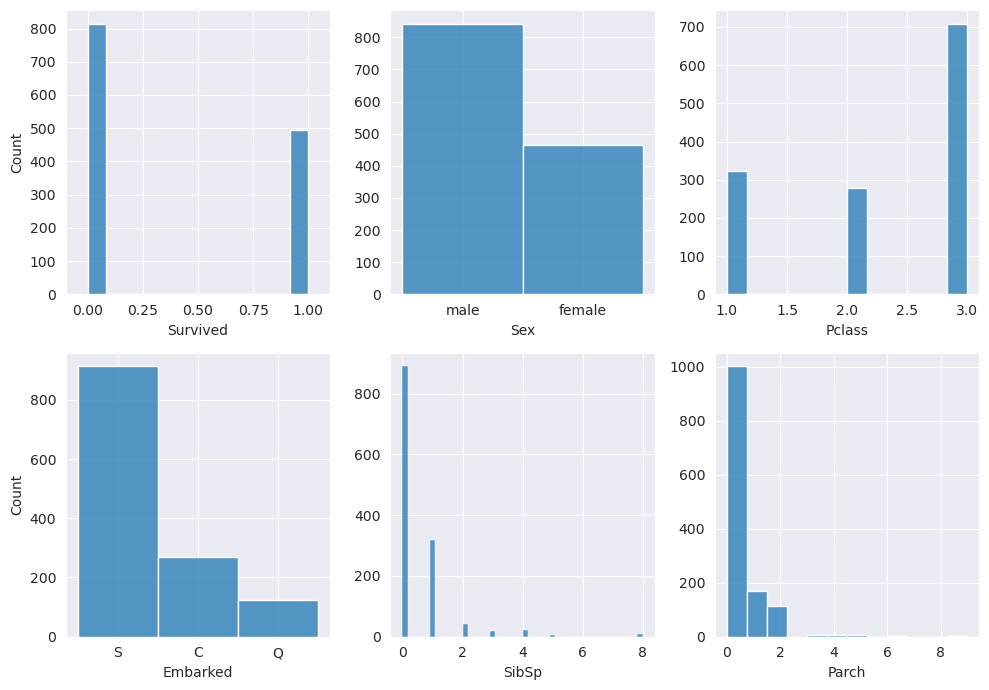

In [12]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=df, x="Survived").set_xlim(-0.1, 1.1)
sns.histplot(ax=axis[0, 1], data=df, x="Sex").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="Pclass").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="Embarked")
sns.histplot(ax=axis[1, 1], data=df, x="SibSp").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="Parch").set(ylabel=None)

plt.tight_layout()
plt.show()

> #### Observaciones
>
> Un histograma es una representación gráfica de la distribución de un conjunto de datos. Se utiliza además para comprender la frecuencia de los datos. Al observar un histograma, podemos entender si los datos están sesgados hacia un extremo, si son simétricos, si tienen muchos valores atípicos, etcétera. Con la representación de cada variable podemos determinar que:
>
> - **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
> - **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
> - **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
> - **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
> - **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
> - **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte si lo hizo.

#### Análisis de Variables Univariante Numéricas

Una **variable numérica** es un tipo de variable que puede tomar valores numéricos (enteros, fracciones, decimales, negativos, etc.) en un rango infinito. Una variable categórica numérica puede ser también una variable numérica (por ejemplo, para los sucesivos análisis, podemos tomar el target `Survived` como numérica también para estudiar relaciones). Normalmente, se representan utilizando un histograma y otro de caja, expuestos juntos. Antes de comenzar a graficar, debemos también identificar cuáles son las numéricas, que son `Fare`, `Age` y `PassengerId`. Sin embargo, esta última carece de sentido, así que graficaremos las dos primeras:

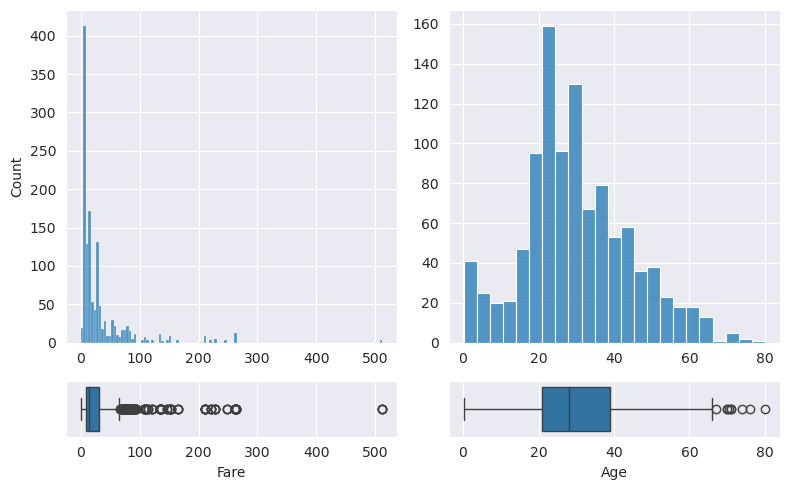

In [13]:
fig, axis = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df, x="Fare").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x="Fare")
sns.histplot(ax=axis[0, 1], data=df, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x="Age")

plt.tight_layout()
plt.show()

> #### Observaciones:
>
> - La combinación de los dos gráficos nos permite conocer las distribuciones y sus características estadísticas.
> - De la visualización resultante podemos tener en claro que ambas variables cuentan con valores atípicos.
> - Las distribuciones tienen asimetría, la primera totalmente sesgada hacia la izquierda, donde la media es inferior a la moda y la otra con menor tendencia.

### Análisis de Variables Multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos para la supervivencia de un pasajero.

Por ejemplo, la variable `Cabin` tiene muchos valores nulos, y tendríamos que asegurar que no hay relación entre ella y `Survived` antes de eliminarla, ya que quizá pudiera ser muy significativa e importante para el modelo y su presencia podría decantar la predicción.

#### Análisis numérico-numérico

Cuando las dos variables que se comparan tienen datos numéricos, se dice que el análisis es numérico-numérico. Para comparar dos columnas numéricas se utilizan:

- diagramas de dispersión y
- análisis de correlaciones
  - correlación = 1 o -1 puede ser dependientes o existir una relación,
  - correlación = 0, son independientes

##### Survived - (Fare, Age)

Utilizaremos la variable `Survived` para comenzar con el análisis bivariante porque al tratarse de una variable categórica, pero codificada en números, puede considerarse como numérica también.

Primero analizamos el target frente a las características numéricas:

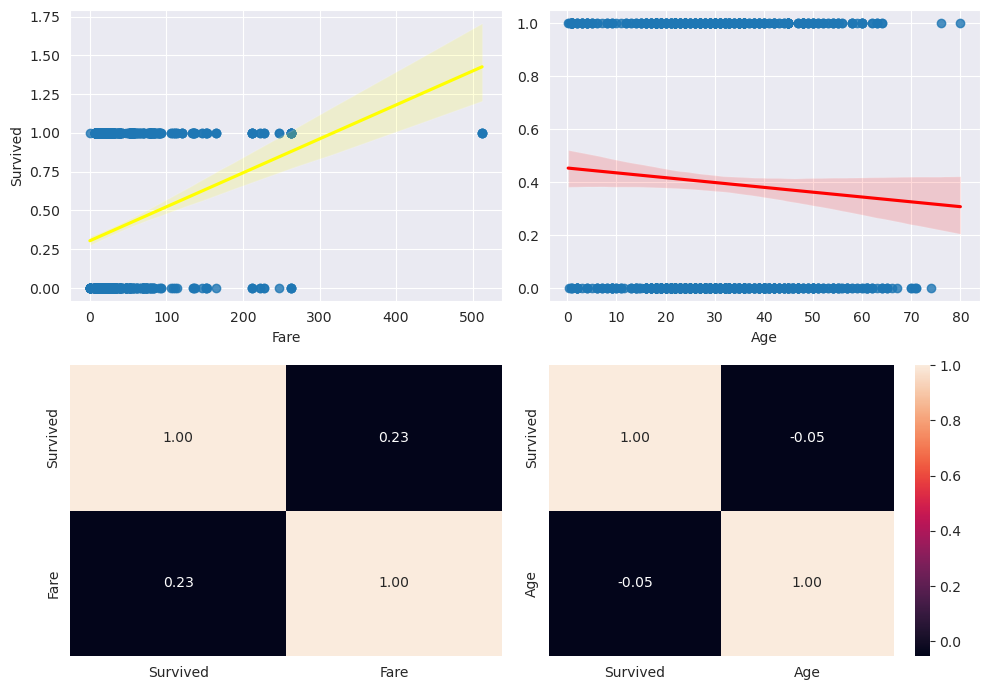

In [12]:
# Generamos las correlaciones
corr_survived_fare = df[["Survived", "Fare"]].corr()
corr_survived_age = df[["Survived", "Age"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="Fare", y="Survived", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_survived_fare, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="Age", y="Survived", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_survived_age, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones
>
> - Existe una relación directa (aunque no muy fuerte) entre el precio del billete `Fare` y la supervivencia del pasajero. Así, algunos pasajeros con un importe bajo de billete tuvieron menos probabilidad de supervivencia frente a los que adquirieron un billete con un precio mayor.
> - También existe una relación lineal negativa, más débil que la anterior entre la edad `Age` y el 'target'. Esto tiene sentido considerando que los niños eran uno de los grupos que tenían preferencia en usar los botes para sobrevivir.
>
> En resumen, a pesar de existir cierta relación con estas características frente a la predictora, la significancia no es muy elevada, no siendo factores decisivos sobre si un pasajero sobrevivía o no.


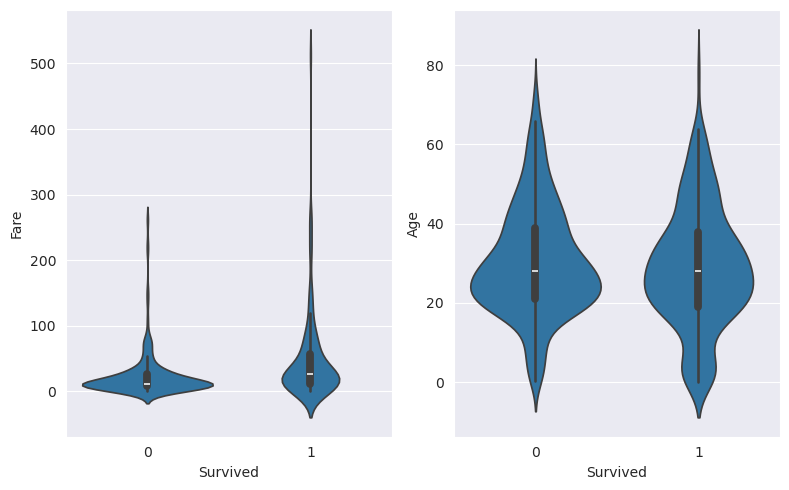

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.violinplot(ax=axis[0], data=df, x='Survived', y='Fare')
sns.violinplot(ax=axis[1], data=df, x='Survived', y='Age')

plt.tight_layout()
plt.show()

> Explicación:
> La forma del "violin" muestra la distribución de la variable. La anchura del violin en cualquier punto indica la densidad de los datos en esa región. Si el violin es más ancho en una parte específica, significa que hay más datos en esa región. Por el contrario, si el violin es más estrecho, significa que hay menos datos.
>
> Las partes superior e inferior del violin representan los valores máximo y mínimo de los datos, respectivamente

##### Fare - Age

A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

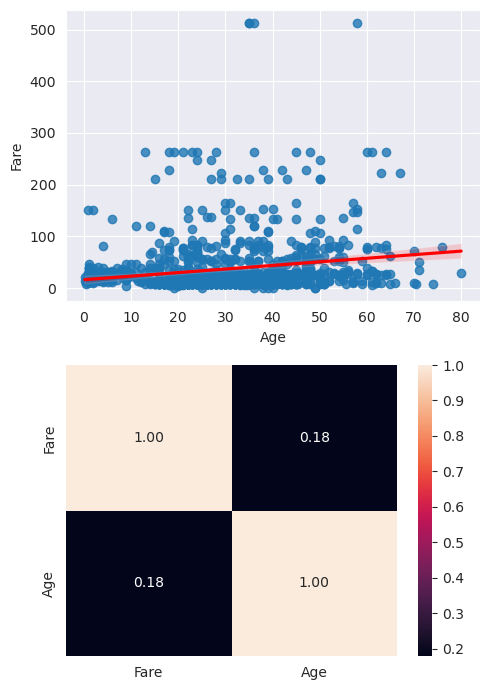

In [15]:
# Generamos la correlación entre ambas
corr_fare_age = df[["Fare", "Age"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="Age", y="Fare", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_fare_age, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> Se puede determinar que no existe una relación muy fuerte entre ambas variables y que la edad no impacta sobre que el precio del billete sea mayor o no.


#### Análisis categórico-categórico

Cuando las dos variables que se comparan tienen datos categóricos, se dice que el análisis es categórico-categórico. Para comparar dos columnas numéricas se utilizan histogramas y combinaciones.


##### Survived - (Sex, Pclass, Embarked, SibSp, Parch)

Primero analizamos el target frente a las características categóricas, una a una. Aquí no habrá combinaciones de varias predictoras y el target:

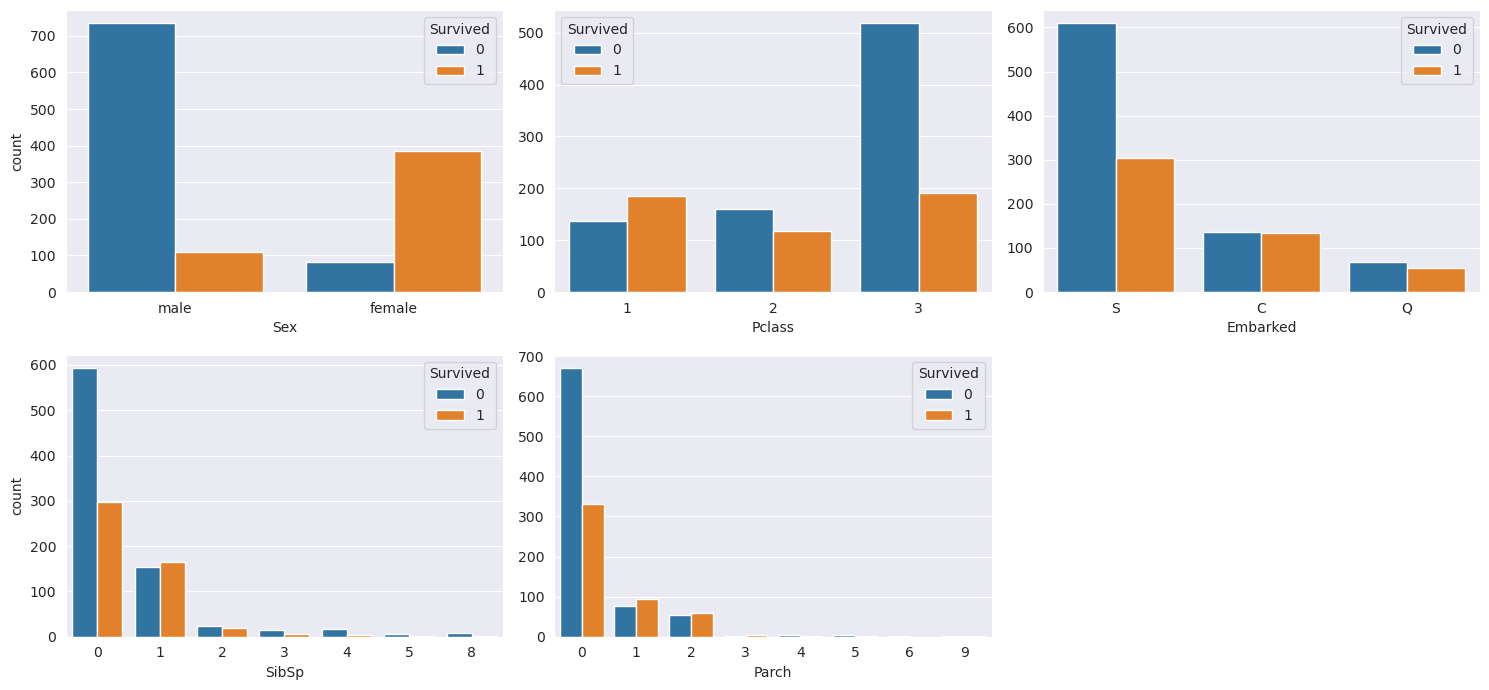

In [16]:
fig, axis = plt.subplots(2, 3, figsize=(15, 7))

sns.countplot(ax=axis[0, 0], data=df, x="Sex", hue="Survived")
sns.countplot(ax=axis[0, 1], data=df, x="Pclass", hue="Survived").set(ylabel=None)
sns.countplot(ax=axis[0, 2], data=df, x="Embarked", hue="Survived").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="SibSp", hue="Survived")
sns.countplot(ax=axis[1, 1], data=df, x="Parch", hue="Survived").set(ylabel=None)
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> Del gráfico anterior podemos obtener las siguientes conclusiones:
>
> - Con mayor proporción sobrevivieron las mujeres frente a los hombres. Esto es así porque en los planes de evacuación tenían prioridad las mujeres frente a los hombres.
> - Las personas que viajaron solas tuvieron más problemas para sobrevivir frente a las que viajaron acompañadas.
> - Aquellos que viajaron en una mejor clase en el Titanic tuvieron una mayor probabilidad de supervivencia.


##### Combinaciones del target con varias predictoras

El análisis multivariante también permite combinar el target con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

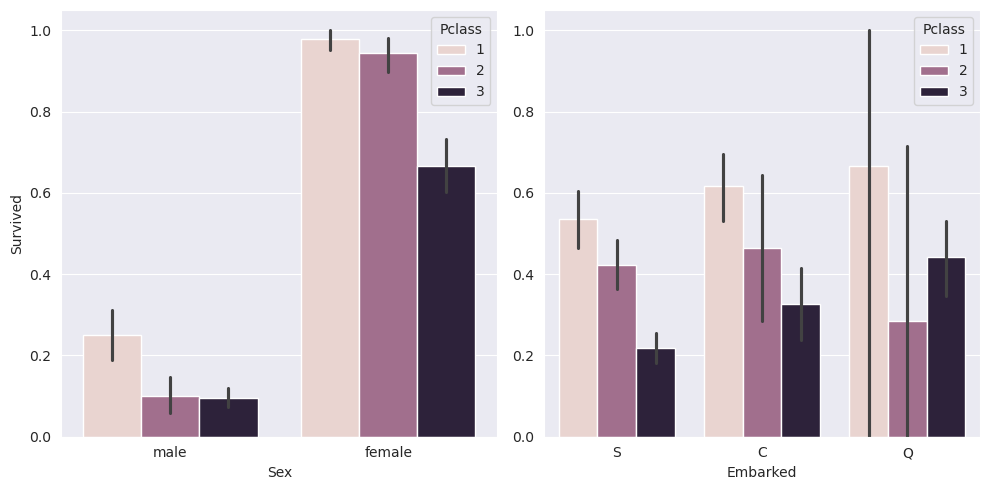

In [17]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.barplot(ax=axis[0], data=df, x="Sex", y="Survived", hue="Pclass")
sns.barplot(ax=axis[1], data=df, x="Embarked", y="Survived", hue="Pclass").set(ylabel=None)

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> De esos análisis se observa claramente que:
>
> - Independientemente del puerto de embarque, las mujeres tuvieron más posibilidades de supervivencia independientemente de la clase en la que viajaron, lo que refuerza el conocimiento obtenido anteriormente.
> - Además, de media, las personas que viajaron en clases más altas sobrevivieron más que aquellos que no lo hicieron.


##### Análisis de correlaciones

El análisis multivariante también permite combinar el target con varias predictoras al mismo tiempo para enriquecer el análisis. Este tipo de operaciones deben ser subjetivas y deben combinar características relacionadas entre sí.

In [14]:
# Creo columnas numéricas para las variables categóricas
df["Sex_n"] = pd.factorize(df["Sex"])[0]
df["Embarked_n"] = pd.factorize(df["Embarked"])[0]

> Warning:
>
> El método `.factorize()` recorre los valores únicos de la columna y le asigna un valor (que va creciendo)
> Que sucede si la próxima vez que factorize, el primer valor es distingo.
>
> Generalizando:
>
> Siempre que codifiquemos columnas categóricas tengo que guardar el codificador (en un json, en pickle, o lo que sea)
>
> Decodificadores: OneHotEncoder, LabelEncoder, etc.


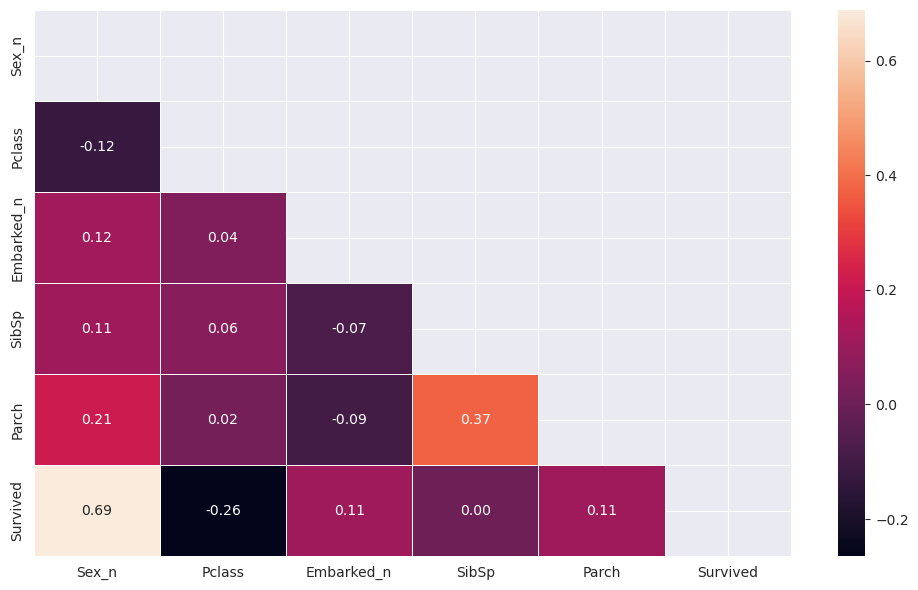

In [15]:
corr = df[["Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - El análisis de correlaciones refleja una fuerte relación directa entre el sexo (`Sex`) del pasajero y su supervivencia, como hemos visto en apartados anteriores.
> - Además, se aprecia una relación entre el número de acompañantes de los pasajeros (variables `SibSp` y `Parh`).
> - El resto de las correlaciones son débiles y no son tan significativas como para contemplarlas en el análisis.

#### Análisis numérico-categórico (completo)

Este es el análisis a mayor detalle que podemos llevar a cabo. Para ello, simplemente hemos de calcular las correlaciones entre las variables, ya que es el mayor indicativo sobre las relaciones.

Así, una vez comprobemos que existe alguna relación, podremos profundizar en el estudio.

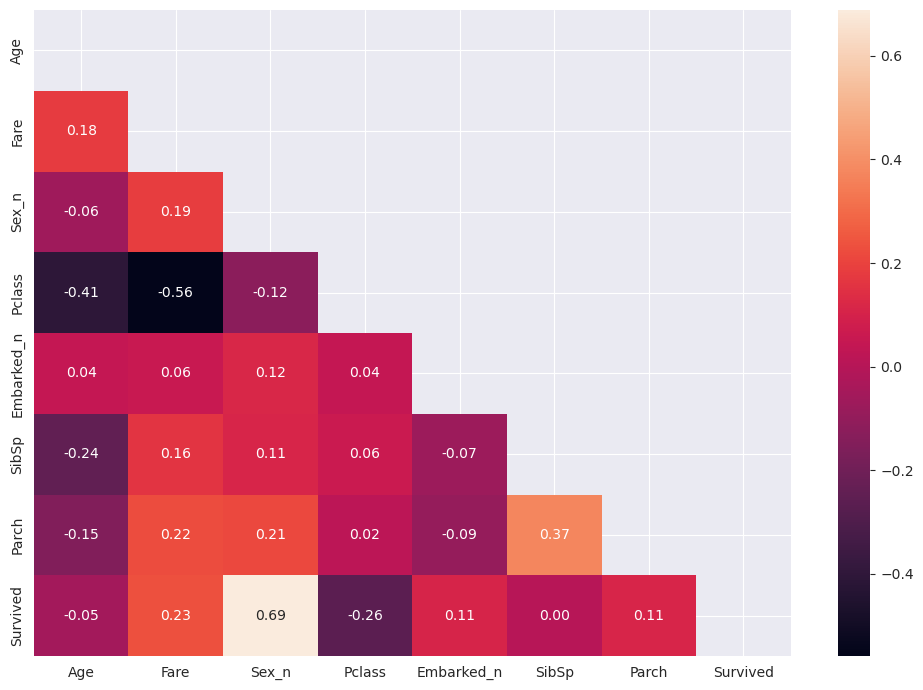

In [16]:
corr = df[["Age", "Fare", "Sex_n", "Pclass", "Embarked_n", "SibSp", "Parch", "Survived"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - Existe una relación entre la tipología de clase `Pclass` y la edad del pasajero `Age` fuertemente negativa (los que viajaban en primera clase eran personas con alta edad).
> - También entre la clase `Pclass` y la tarifa pagada `Fare`, algo que tiene mucho sentido.
> - El resto de correlaciones se mantienen con respecto a lo visto anteriormente.


Una vez analizada la correlación, analicemos los dos casos vistos para corroborar la teoría:

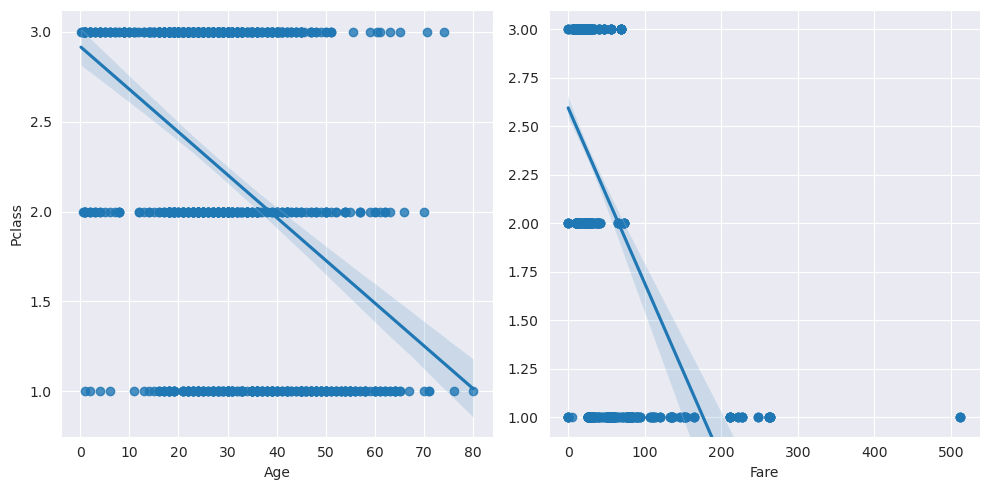

In [21]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.regplot(ax=axis[0], data=df, x="Age", y="Pclass")
sns.regplot(ax=axis[1], data=df, x="Fare", y="Pclass").set(ylabel=None, ylim=(0.9, 3.1))

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - En el primer gráfico vemos que cuando la edad avanza la presencia de tickets de primera clase se hace más notoria, y conforme la edad decrece, los tickets de tercera clase se hacen más presentes, reforzando la relación negativa entre las variables observadas.
> - El segundo gráfico también refuerza lo observado, ya que los tickets de mejor clase deben ser más caros.


Una vez calculada la correlación podemos dibujar el gráfico `pairplot` (es un paso opcional):

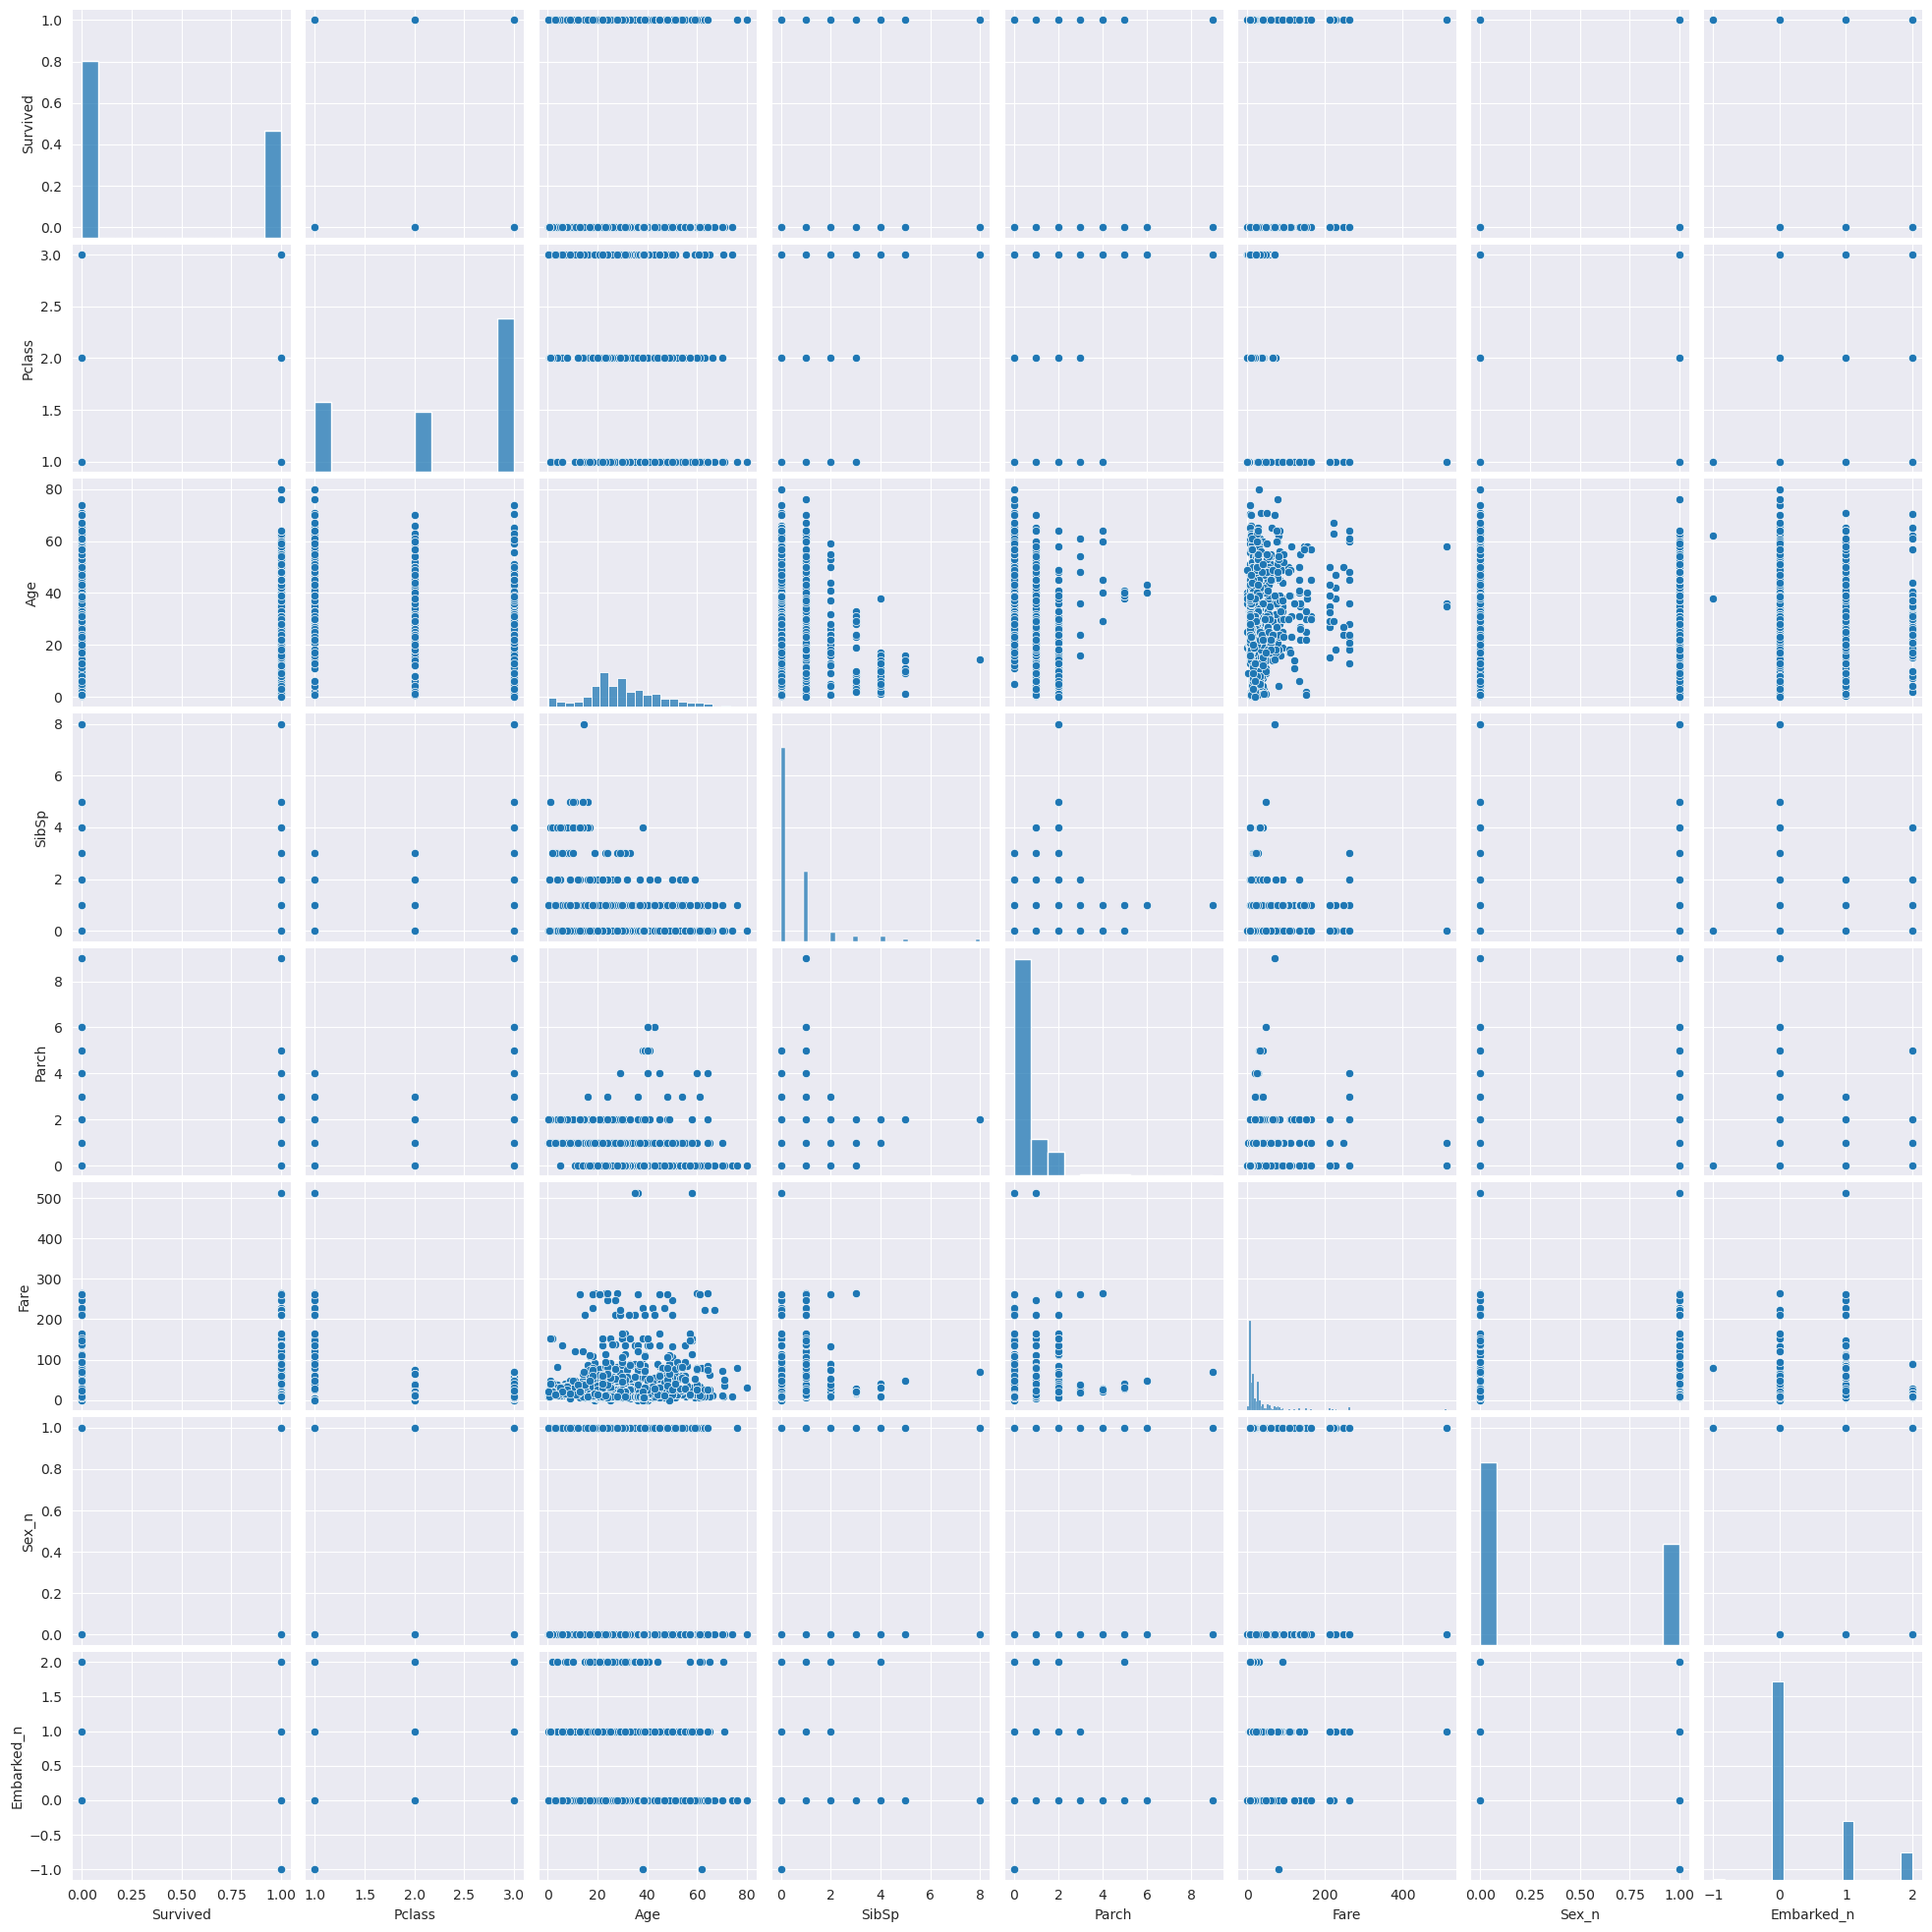

In [22]:
sns.pairplot(data=df)